In [14]:
import numpy as np
%matplotlib notebook
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


In [15]:
import numpy as np
%matplotlib notebook
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


## Numerical Solutions to First-Order DE
* Euler's Method
* Runge-Kutta Method

## THE GENERAL FORM OF THE EQUATION 

#### $\LARGE \frac{dv}{dt} = \frac{((B*c)-k*v^p}{Mi-B*t}-G$

### Example: 
$\LARGE \frac{dv}{dt} = \frac{(((125.746)*2)-1.45*v^p}{12850-8802.25}-9.8$  
#### Initial condition: v(0) = 50

G = -9.8
Burn rate = 125.746
c = 2km/s
K = 1.45
Initial Mass = 12850 kilograms
Time (t) = t seconds

##  ACTUAL SOLUTION 
v(t) = $\LARGE \frac{((-725v^p)+19708229)*t}{(2023875)}+50$



In [16]:
## HERE I DECLARE ALL THE CONSTANTS I WILL BE USING
g = 9.8 # m/s^2 Acceleration due to gravity
b = 125.746 # kg/s Burn rate.
c = 2000. #m/s # Exhaust velocity in m/s since g is in m/s^2 
m0 = 12850. #kg Initials mass
k = 1.45 # N/(m/s) = kg*m/s^2*(s/m) = kg/s. So that k*v = kg/s*m/s = kg*m/s^2 = N unit of force. 
ti = 0
tf = 100. # Final time of simulation.   
v0 =0  
##
Mf = (m0-b*tf)/m0 
Mi = (m0-b*ti)/m0 
# Mt = (m0-b*t)/m0 # Varies with t
v_a_f = v0*Mf**(k/b) - g*b*tf/(b-k)+(b*c/k + g*m0/(b-k))*(1-Mf**(k/b)) 
print(v_a_f) # in m/s

6570.430707639482


<IPython.core.display.Javascript object>


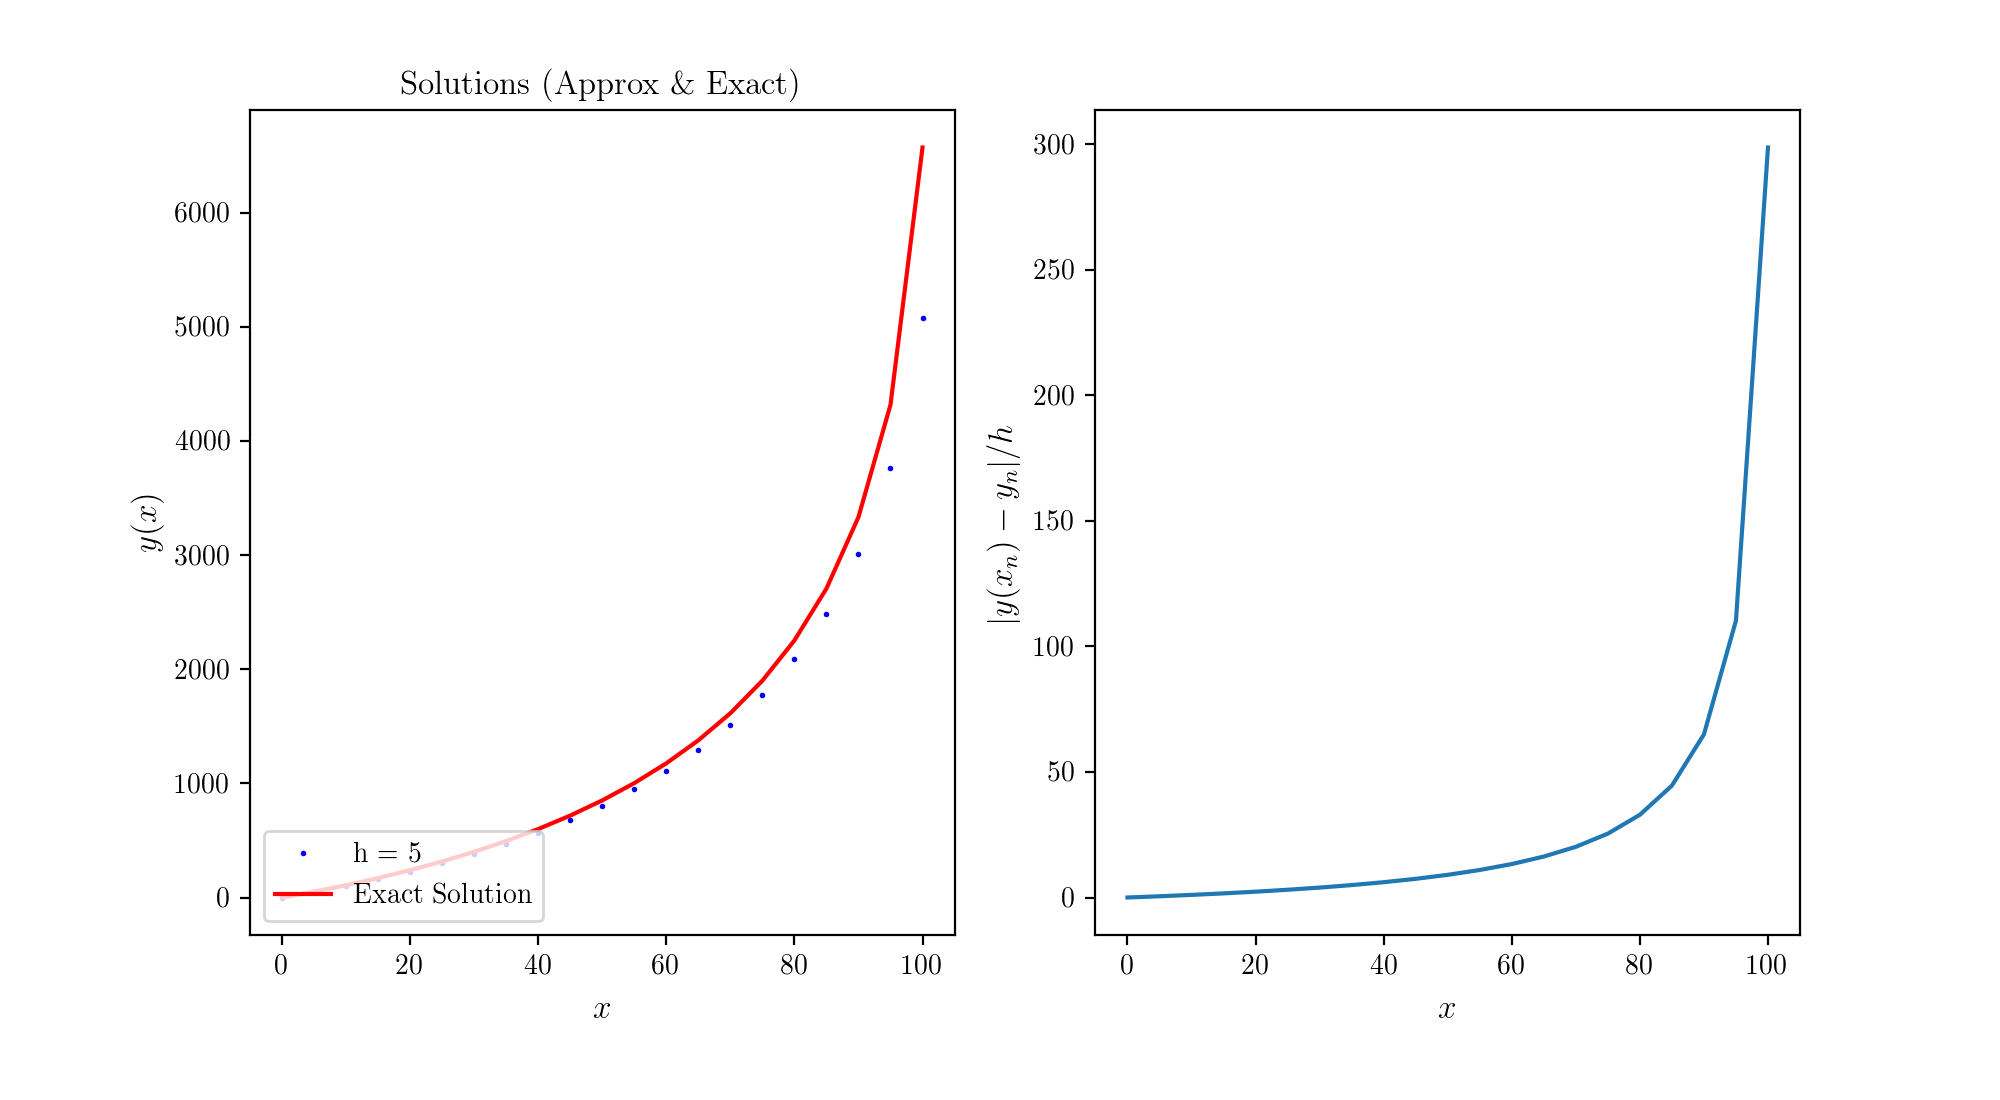

hvalues ['5 ']
h       | Abs Value of Error at x = 1
5.00000 | 1493.6398109550727895


In [21]:
### EULER's Method (Plain Vanilla)
# Slope at a point x,y
def slope(v,t,p):
    dvdt = (b*c - (m0-b*t)*g - k*v)/(m0-b*t) # This can be easily checked for errors.
    return dvdt

fig, axs = plt.subplots(1,2,figsize = (10,5.5))
fig.subplots_adjust(top=0.9,bottom =0.15)
h_v = [5]


# hvalues
 
str_h = [str(h)+" " for h in h_v]
print('hvalues',str_h)
h_err = []
handle_l0=[]
handle_l1=[]

for h in h_v:
    # tf defined in the previous cell
    t_v = np.linspace(0,tf,int(tf/h+1)) # vector of h values._v 
    Mt = (m0 - b*t_v)/m0 # Note capital M depends on time. You had it as a constant.
    N = t_v.shape[0]
    #v_1_a = (-9.914*t_v[-1])+(1186.586)*(1-(((12850-125.746*t_v[-1])/12850)**(0.01153)))
    v_v = np.zeros(N)
    v_v[0] = 0.0
    for i in range(1,N):
        if v_v[i-1] <= 330:
            p = 1
        if v_v[i-1] < 700 and v_v[i-1] > 330:
            p = 1.5
        if v_v[i-1] >= 700:
            p = 2
        v_v[i] = v_v[i-1]+slope(v_v[i-1],t_v[i-1],p)*h # SLOPE was passed (t,v,p) instead of (v,t,p).
        # See where the slope function is defined. It expects arguments in a specific order.
    
    handl0, = axs[0].plot(t_v,v_v,'b.',markersize=2,label = "h = "+str(h))
    handle_l0.append(handl0)
    v_a = -g*b/(b-k)*t_v + (b*c/k +g*m0/(b-k))*(1-Mt**(k/b))  # Actual y-value at last x MAKE CHANGE REFER BACK
    h_err.append((h,abs(v_a[i]-v_v[-1]))) # Append the h and error values to a list
    ax=axs[1]
    handl1, = ax.plot(t_v,abs(v_v-v_a)/h,label = "h = "+str(h))
    handle_l1.append(handl1)

    
#v_a =(-9.914*t_v)+(1186.586)*(1-(((12850-125.746*t_v)/12850)**(0.01153)))  #CHANGE find the actual solution of v(t)
v_a = v_v[0]*Mt**(k/b)-g*b*t_v/(b-k) + (b*c/k +g*m0/(b-k))*(1-Mt**(k/b))
                        
ax = axs[0]    
handlA, = ax.plot(t_v,v_a,'r',markersize=1,label='Exact Solution')
handle_l0.append(handlA)
ax.legend(handles =handle_l0,loc=3)

#print(handle_l0)
ax.set_title(r'Solutions (Approx \& Exact)',fontsize=12)
ax.set_xlabel('$x$',fontsize = 12)
ax.set_ylabel('$y(x)$',fontsize = 12)
ax = axs[1]
ax.legend(handles =handle_l1)

ax = axs[1]
ax.set_title(r'$\displaystyle \frac{\text{Error}}{h} \leq C$',fontsize=12)
ax.set_xlabel('$x$',fontsize = 12)
ax.set_ylabel('$|y(x_n) - y_n|/h$',fontsize = 12)

fig.suptitle(r'Euler\'s method (Plain Vanilla)',fontsize = 16)
print('{:7} | {:16}'.format('h',"Abs Value of Error at x = 1"))
for he in h_err:
    print('{:1.5f} | {:1.16f}'.format(he[0],he[1]))


## Look how the error is growing (plot on the right)
## Check for errors. Use this to change the code below. 


<IPython.core.display.Javascript object>


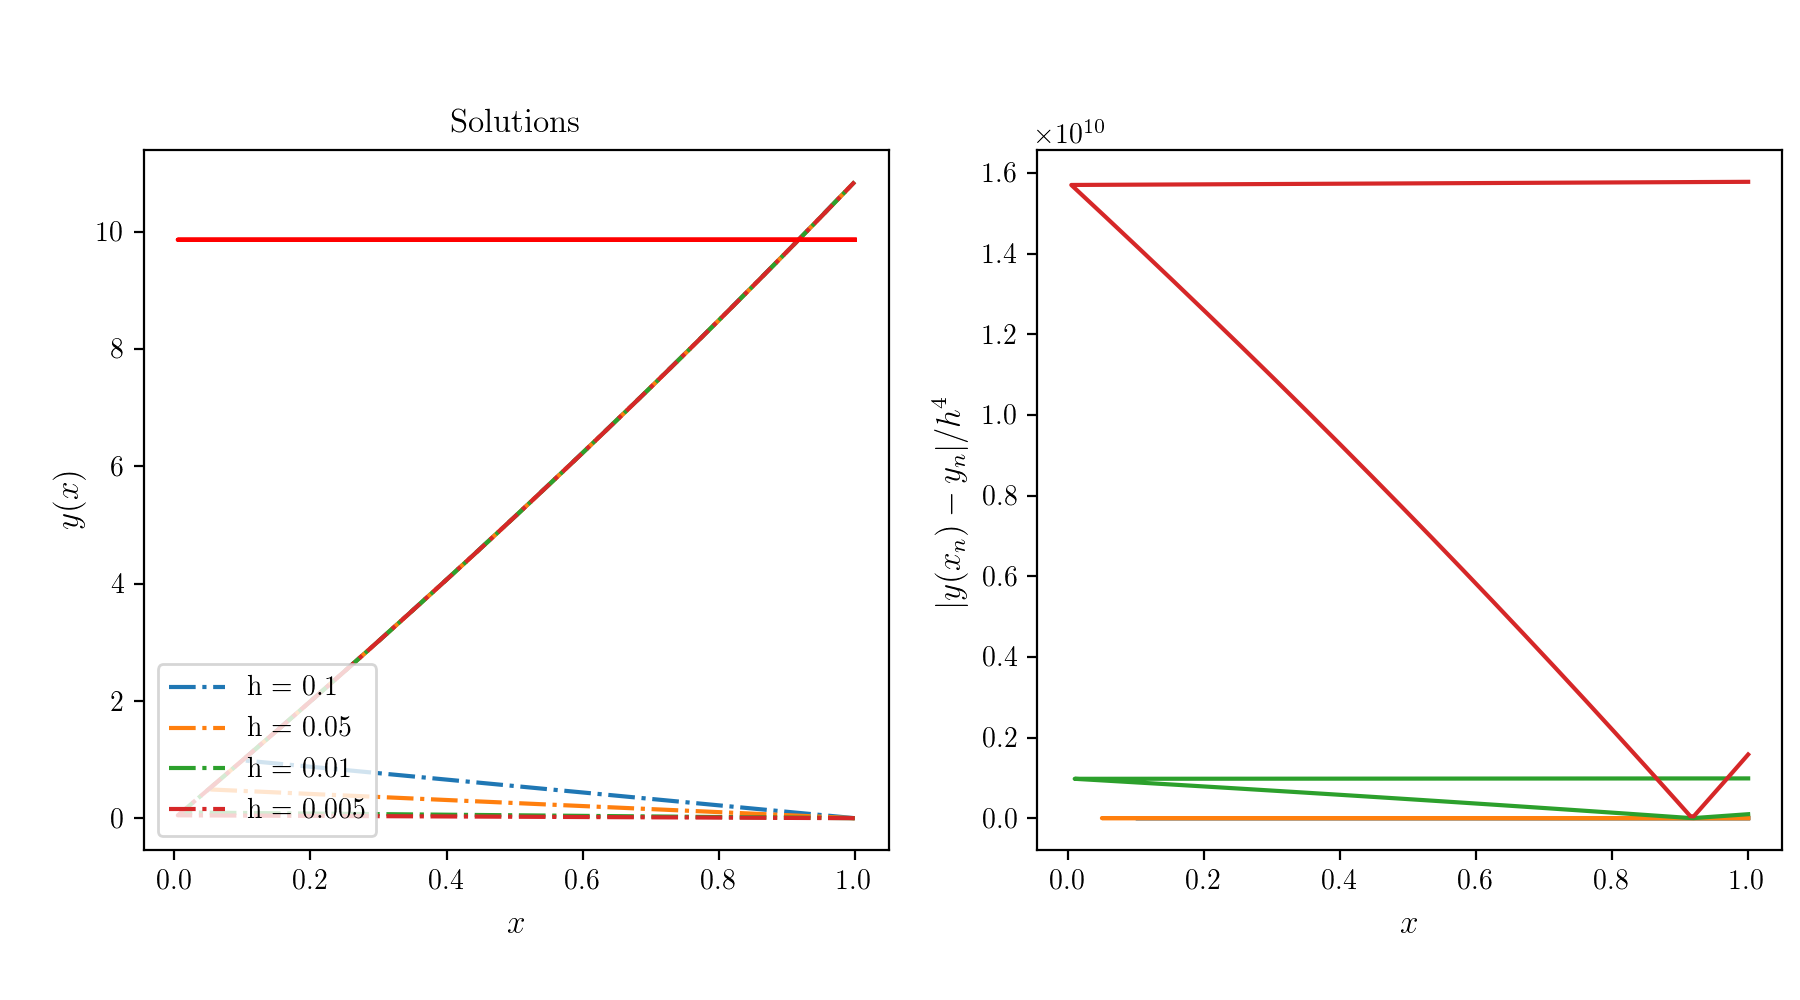

h       | Abs Value of Error at x = 1
0.10000 | 0.9869474689713573
0.05000 | 0.9869532441783544
0.01000 | 0.9869578888380477
0.00500 | 0.9869584705216592


In [25]:
# The runge kutta method

fig, axs = plt.subplots(1,2,figsize=(9,5))
#fig.tight_layout()
fig.subplots_adjust(top=0.85,bottom =0.15,left=0.08,right=.99)
h_v = [0.1, 0.05,0.01,0.005]#,0.0005]
# for h<0.0001 error does not seem to drop (reaching machine precision) 

h_err= [] # list with h and error
handle_l0=[]
handle_l1=[]

for h in h_v:
    t_v = np.linspace(np.longdouble(0),1,int(1./h+1))
    N = t_v.shape[0]
    v_v = np.zeros(N)
    t_v[0] = np.longdouble(1)
    
    for i in range(1,N):
        ##
        k1 = slope(t_v[i-1],v_v[i-1],p) # Slope at xn,yn
        y2 = v_v[i-1]+h/2*k1          # Use k1 to get to new point at h/2
        ##
        k2 = slope(t_v[i-1]+h/2,y2,p)   # Compute slope at new point 
        y3 = v_v[i-1]+h/2*k2          # Use that slope to find an improved point 
        ##
        k3 = slope(t_v[i-1]+h/2,y3,p)   # Get slope at improved point
        y4 = v_v[i-1]+h*k3            # Use the above slope to estimate new Euler point at x_n+1
        ##
        k4 = slope(t_v[i],y4,p)         # Compute slope at x_n+1, y_n+1
        v_v[i] = v_v[i-1]+h*(k1+2*k2+2*k3+k4)/6 # Plug it back in to simpson's rule
        
    handl0, = axs[0].plot(t_v,v_v,'-.',markersize=0.3,label = "h = "+str(h))
    handle_l0.append(handl0)
    v_a = ((-t_v[-1]*(725*t_v-39919442))/4047750)  # Actual y-value at last x
    h_err.append((h,abs(v_a[i]-v_v[-1]))) 
    ax=axs[1]
    handl1, = ax.plot(t_v,abs(v_v-v_a)/h**4,label = "h = "+str(h))
    handle_l1.append(handl1)

v_a = ((-t_v[-1]*(725*t_v-39919442))/4047750) 
ax = axs[0]    
ax.plot(t_v,v_a,'r',markersize=1)
ax.set_title(r'Solutions',fontsize=12)
ax.set_xlabel('$x$',fontsize = 12)
ax.set_ylabel('$y(x)$',fontsize = 12)
ax.legend(handles=handle_l0,loc=3)

ax = axs[1]
ax.set_title(r'$\displaystyle \frac{\text{Error}}{h^4} \leq C$',fontsize=12)
ax.set_xlabel('$x$',fontsize = 12)
ax.set_ylabel('$\displaystyle |y(x_n) - y_n|/h^4$',fontsize = 12)
ax.legend(handles=handle_l1,loc=4)

fig.suptitle('Runge-Kutta Method',fontsize=16)
plt.show()

print('{:7} | {:16}'.format('h',"Abs Value of Error at x = 1"))
for he in h_err:
    print('{:1.5f} | {:1.16f}'.format(he[0],he[1]))
